# Imports

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. Data analysis

## 1.1 Basic Data Overview

In [7]:
DATA_DIR = "data/"
df = pd.read_csv(os.path.join(DATA_DIR, "train_submission.csv"))

In [8]:
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 entries:")
print(df.head())
print("\nColumn info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())

Dataset shape: (38854, 4)

First 5 entries:
    ID   Usage                                               Text Label
0  136  Public  Finalment  Atena le recibe en l'acropoli d'Ate...   arg
1   62  Public  Jane Laffort fille de Joseph Laffort et d' Ang...   lat
2   74  Public  Сонзэ ялаксонзо  - Роджер Джозеф Бошкович  - у...   myv
3   40  Public  Mɛniɛ nkùɔ dìì mɔ̀nnì bɛnìtìbɛ̀ kɛ́deè  kɛ̀ Nɔ...   tbz
4   30  Public  Ka go dirisa thekniki yeo ya phetogonepiso  Le...   tsn

Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38854 entries, 0 to 38853
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      38854 non-null  int64 
 1   Usage   38854 non-null  object
 2   Text    38854 non-null  object
 3   Label   38754 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB
None

Missing values:
ID         0
Usage      0
Text       0
Label    100
dtype: int64


## 1.2. Class Distribution Analysis


Unique labels (389):
Label
tgk    300
som    200
kaa    200
tat    200
gom    200
      ... 
pau      2
kua      1
gaa      1
gcr      1
toi      1
Name: count, Length: 389, dtype: int64


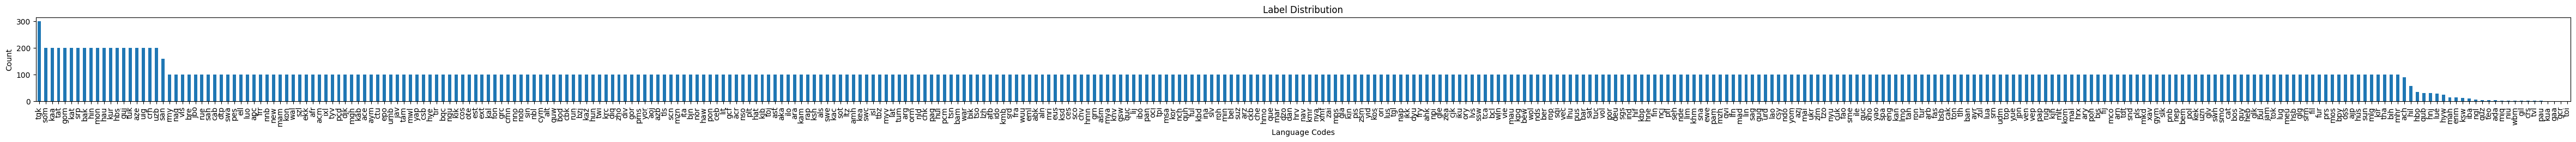

In [9]:
label_dist = df["Label"].value_counts()
print(f"\nUnique labels ({len(label_dist)}):")
print(label_dist)

# Visualize distribution
plt.figure(figsize=(60, 2))
label_dist.plot(kind="bar")
plt.title("Label Distribution")
plt.xlabel("Language Codes")
plt.ylabel("Count")
plt.show()

## 1.3 Text Length Analysis

<Figure size 1200x1000 with 0 Axes>

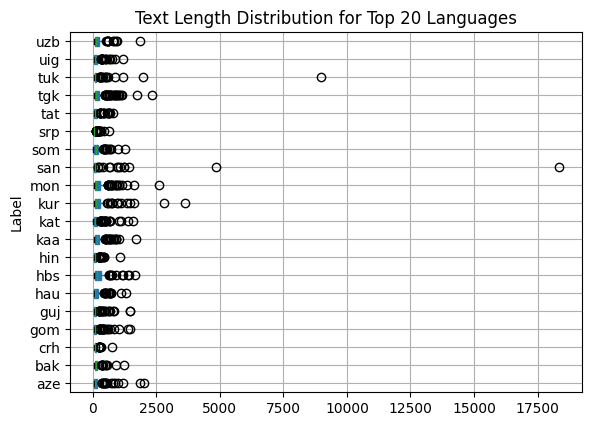

In [10]:
df["Text Length"] = df["Text"].apply(len)

top_n = 20  # Adjust as needed
top_languages = df["Label"].value_counts().nlargest(top_n).index

plt.figure(figsize=(12, 10))
df[df["Label"].isin(top_languages)].boxplot(
    column="Text Length", by="Label", vert=False, patch_artist=True
)
plt.title(f"Text Length Distribution for Top {top_n} Languages")
plt.suptitle("")
plt.show()

## 1.4 Character Set Analysis

In [ ]:
from scripts.utils import detect_script

sample_text = (
    ",عرض أسعار غير ملزم US$ ١٧٣٫٧١"  # Text using multiple scripts/punctuation.
)
result = detect_script(sample_text)
print(result)
# print top keys sorted by count, ignore zeros
print(
    {
        k: v
        for k, v in sorted(result.items(), key=lambda item: item[1], reverse=True)
        if v > 0
    }
)

{'Basic Latin': 4, 'Latin-1 Supplement': 0, 'Latin Extended-A': 0, 'Latin Extended-B': 0, 'IPA Extensions': 0, 'Spacing Modifier Letters': 0, 'Combining Diacritical Marks': 0, 'Greek and Coptic': 0, 'Cyrillic': 0, 'Cyrillic Supplement': 0, 'Armenian': 0, 'Hebrew': 0, 'Arabic': 21, 'Syriac': 0, 'Arabic Supplement': 0, 'Thaana': 0, 'NKo': 0, 'Samaritan': 0, 'Mandaic': 0, 'Devanagari': 0, 'Bengali': 0, 'Gurmukhi': 0, 'Gujarati': 0, 'Oriya': 0, 'Tamil': 0, 'Telugu': 0, 'Kannada': 0, 'Malayalam': 0, 'Sinhala': 0, 'Thai': 0, 'Lao': 0, 'Tibetan': 0, 'Myanmar': 0, 'Georgian': 0, 'Hangul Jamo': 0, 'Ethiopic': 0, 'Ethiopic Supplement': 0, 'Cherokee': 0, 'Unified Canadian Aboriginal Syllabics': 0, 'Ogham': 0, 'Runic': 0, 'Tagalog': 0, 'Hanunoo': 0, 'Buhid': 0, 'Tagbanwa': 0, 'Khmer': 0, 'Mongolian': 0, 'Unified Canadian Aboriginal Syllabics Extended': 0, 'Limbu': 0, 'Tai Le': 0, 'New Tai Lue': 0, 'Khmer Symbols': 0, 'Buginese': 0, 'Tai Tham': 0, 'Balinese': 0, 'Sundanese': 0, 'Batak': 0, 'Lepcha'

## 1.5 Duplicate Check

In [13]:
duplicates = df[df.duplicated("Text", keep=False)]
print(f"\nFound {len(duplicates)} duplicate texts")


Found 4 duplicate texts


## 1.6 Language Examples

In [14]:
lang = df["Label"].dropna().unique()[10]
print(f"\nExamples for {lang}:")
print(df[df["Label"] == lang]["Text"].head(1).values[0])


Examples for kac:
Pyada la wa tsun lai wa ai gaw  shanhte gaw htim gasat ai na matu lit nga ai ngu shadu da ai gasat myit rawt ai Daesh (ISIL) hpe nrup nsen ai re.


# 2. Data preprocessing

In [4]:
import pandas as pd
import os

import matplotlib.pyplot as plt
from scripts.utils import detect_script, remove_links_and_tags

# Load the data
DATA_DIR = "data"
data = pd.read_csv(os.path.join(DATA_DIR, "train_submission.csv"))
data = data.dropna(subset=["Label"])
data = data.rename(columns={"Text": "text", "Label": "label"})

# Clean the text column by converting to lowercase, stripping whitespace, and removing links/tags
data["text"] = (
    data["text"].apply(str.lower).apply(str.strip).apply(remove_links_and_tags)
)

# Add script group name without triggering SettingWithCopyWarning
data["characters_group"] = data["text"].apply(detect_script)

X = data[["text", "characters_group"]]
y = data["label"]

In [5]:
X

,text,characters_group
0,finalment atena le recibe en l'acropoli d'ate...,Basic Latin
1,jane laffort fille de joseph laffort et d' ang...,Basic Latin
2,сонзэ ялаксонзо - роджер джозеф бошкович - у...,Cyrillic
3,mɛniɛ nkùɔ dìì mɔ̀nnì bɛnìtìbɛ̀ kɛ́deè kɛ̀ nɔ...,Basic Latin
4,ka go dirisa thekniki yeo ya phetogonepiso le...,Basic Latin
...,...,...
38849,gorillas es divide in duo species e 4 o 5 subs...,Basic Latin
38850,bakebi bamba se nansha nanku etshi mukila wa ...,Basic Latin
38851,all äonen de dorvör liggen doot weern fröher...,Basic Latin
38852,اور اگر یہ لوگ اپنی جانوں پر ظلم کر کے آپکے حض...,Arabic


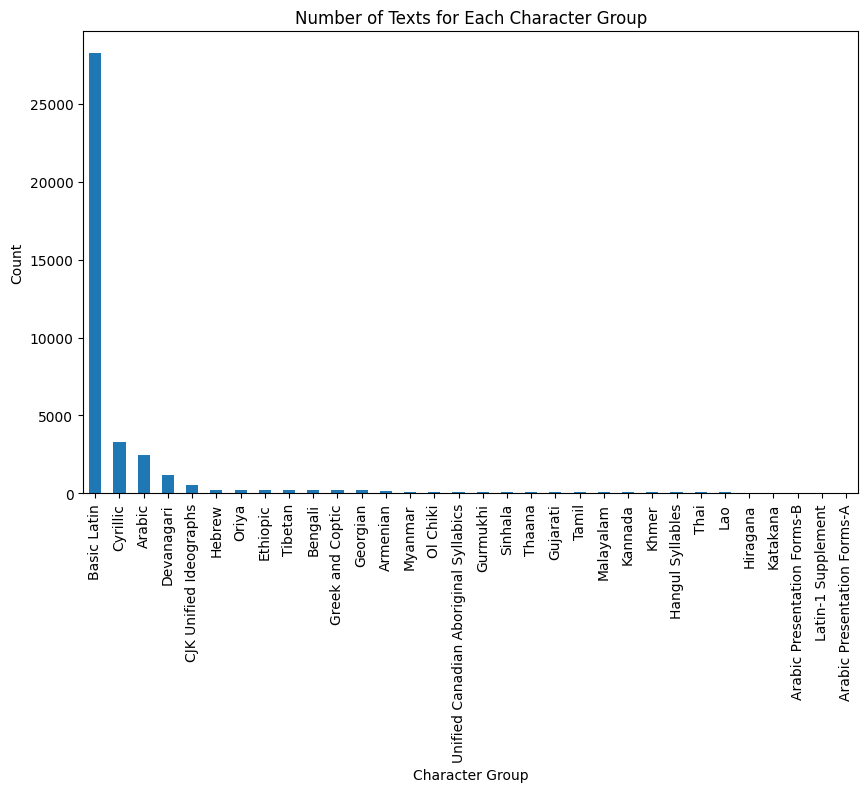

In [9]:
plt.figure(figsize=(10, 6))
counts = X["characters_group"].value_counts()
counts.plot(kind="bar")
plt.title("Number of Texts for Each Character Group")
plt.xlabel("Character Group")
plt.ylabel("Count")
plt.show()

# 3. Model

In [31]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from scripts.utils import detect_script, remove_links_and_tags


# Load the data
def load_and_preprocess_data(test=False):
    DATA_DIR = "data"
    if test:
        data = pd.read_csv(os.path.join(DATA_DIR, "test_without_labels.csv"))
        data = data.rename(columns={"Text": "text"})
    else:
        data = pd.read_csv(os.path.join(DATA_DIR, "train_submission.csv"))
        data = data.dropna(subset=["Label"]).rename(
            columns={"Text": "text", "Label": "label"}
        )

    # Preprocess text
    data["text"] = (
        data["text"].apply(str.lower).apply(str.strip).apply(remove_links_and_tags)
    )
    data["characters_group"] = data["text"].apply(detect_script)

    X = data[["text", "characters_group"]]
    if test:
        return X, data

    y = data["label"]
    return X, y, data


def save_model_test_predictions(pipeline, model_name):
    # Apply the model to the test set
    X_test, data = load_and_preprocess_data(test=True)
    y_test_pred = pipeline.predict(X_test)

    # Save the predictions to a CSV file
    submission = pd.DataFrame({"ID": data["ID"].values, "Label": y_test_pred})

    # Save the submission file
    submission.to_csv(f"output/{model_name}_submission.csv", index=False)


# Split the data into training and validation sets
X, y, data = load_and_preprocess_data()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## 3.1 TF-IDF and logistic regression

This module demonstrates the creation and usage of a machine learning pipeline for text and categorical data processing, followed by logistic regression classification.

**Process Overview**:
1. Feature Engineering:
    - Text Processing:
      - Applies TF-IDF vectorization on the "text" column.
      - Uses character-based n-grams (range from 2 to 6).
      - Limits the number of features to 2000.
    - Categorical Processing:
      - Applies One-Hot Encoding on the "characters_group" column.

2. Pipeline Construction:
    - Combines the preprocessing steps using a ColumnTransformer.
    - Integrates a Logistic Regression classifier (using a maximum of 100 iterations and parallel processing via n_jobs=-1).

3. Model Training and Evaluation:
    - The pipeline is fitted with training data (X_train and y_train).
    - Predictions are made on the validation set (X_val), producing y_pred.
    - Evaluation is performed using a classification report comparing y_val and y_pred, with zero division handled by setting zero_division=0.

In [40]:
# Create a column transformer for feature engineering:
preprocessor = ColumnTransformer(
    transformers=[
        (
            "text",
            TfidfVectorizer(ngram_range=(2, 6), analyzer="char", max_features=2000),
            "text",
        ),
        ("char", OneHotEncoder(handle_unknown="ignore"), ["characters_group"]),
    ]
)


pipeline = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clf", LogisticRegression(max_iter=100, n_jobs=-1)),
    ]
)

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the validation set
y_pred = pipeline.predict(X_val)

# Print classification report and save it to the output directory
report = classification_report(y_val, y_pred, zero_division=0)
output_path = os.path.join("output", "tf-idf_logistic_regression_classification_report.txt")
with open(output_path, "w") as f:
    f.write(report)
print(report)

              precision    recall  f1-score   support

         abk       1.00      1.00      1.00        25
         ace       0.94      0.94      0.94        16
         ach       0.94      1.00      0.97        17
         acm       0.33      0.30      0.32        20
         acr       0.95      0.82      0.88        22
         ada       0.00      0.00      0.00         1
         afb       0.36      0.16      0.22        31
         afr       0.77      0.87      0.82        23
         ahk       0.91      1.00      0.95        20
         ajp       0.19      0.33      0.24        15
         aka       0.65      0.81      0.72        21
         aln       0.67      0.76      0.71        21
         als       0.37      0.29      0.33        24
         alt       0.73      0.76      0.74        21
         amh       0.85      0.81      0.83        27
         aoj       0.96      1.00      0.98        23
         apc       0.32      0.32      0.32        22
         ara       0.27    

In [34]:
save_model_test_predictions(pipeline, "tf-idf_logistic_regression")

## 3.2 Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

preprocessor = ColumnTransformer(
    transformers=[
        (
            "text",
            TfidfVectorizer(ngram_range=(2, 6), analyzer="char", max_features=2000),
            "text",
        ),
        ("char", OneHotEncoder(handle_unknown="ignore"), ["characters_group"]),
    ]
)

# Pipeline with preprocessing and logistic regression classifier
rf_pipeline = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clf", RandomForestClassifier(n_estimators=10, n_jobs=-1, max_depth=16)),
    ]
)

# Train the model
rf_pipeline.fit(X_train, y_train)

# Predict on the validation set
y_pred = rf_pipeline.predict(X_val)

# Print classification report
print(classification_report(y_val, y_pred, zero_division=0))

              precision    recall  f1-score   support

         abk       0.48      0.44      0.46        25
         ace       0.62      0.31      0.42        16
         ach       0.00      0.00      0.00        17
         acm       0.16      0.25      0.19        20
         acr       0.72      0.59      0.65        22
         ada       0.00      0.00      0.00         1
         afb       0.15      0.06      0.09        31
         afr       0.09      0.26      0.14        23
         ahk       0.69      1.00      0.82        20
         ajp       0.03      0.07      0.04        15
         aka       0.40      0.29      0.33        21
         aln       0.27      0.38      0.31        21
         als       0.12      0.04      0.06        24
         alt       0.00      0.00      0.00        21
         amh       0.81      0.63      0.71        27
         aoj       0.00      0.00      0.00        23
         apc       0.06      0.05      0.05        22
         ara       0.20    

## 3.3 SVM

In [39]:
from sklearn.svm import SVC

preprocessor = ColumnTransformer(
    transformers=[
        (
            "text",
            TfidfVectorizer(ngram_range=(2, 6), analyzer="char", max_features=2000),
            "text",
        ),
        ("char", OneHotEncoder(handle_unknown="ignore"), ["characters_group"]),
    ]
)

svc_pipeline = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clf", SVC(kernel="rbf", C=1)),
    ]
)

# Train the model
svc_pipeline.fit(X_train, y_train)

# Predict on the validation set
y_pred = rf_pipeline.predict(X_val)

# Print classification report
print(classification_report(y_val, y_pred, zero_division=0))

              precision    recall  f1-score   support

         abk       0.48      0.44      0.46        25
         ace       0.62      0.31      0.42        16
         ach       0.00      0.00      0.00        17
         acm       0.16      0.25      0.19        20
         acr       0.72      0.59      0.65        22
         ada       0.00      0.00      0.00         1
         afb       0.15      0.06      0.09        31
         afr       0.09      0.26      0.14        23
         ahk       0.69      1.00      0.82        20
         ajp       0.03      0.07      0.04        15
         aka       0.40      0.29      0.33        21
         aln       0.27      0.38      0.31        21
         als       0.12      0.04      0.06        24
         alt       0.00      0.00      0.00        21
         amh       0.81      0.63      0.71        27
         aoj       0.00      0.00      0.00        23
         apc       0.06      0.05      0.05        22
         ara       0.20    